In [85]:
import numpy as np
import sys
import math
import matplotlib.pyplot as plt
import pickle
import os
import time

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [36]:
log_file = open('matched_log_file.txt', 'r')
lines = pickle.load(log_file)

In [37]:
lines[1]

{'ALPost': [],
 'APost': [],
 'ARPost': [],
 'Ball_centre': (15, 218),
 'Balls': [],
 'HLPost': [],
 'HNaovar': 0.392699,
 'HPost': [],
 'HRPost': [],
 'Heading': 3.141592653589793,
 'HeadingNao': 1.5707963267948966,
 'LPost': [],
 'Left_centre': (270, 280),
 'Location': [270, 290],
 'NPost': [],
 'RPost': [],
 'Right_centre': (270, 300),
 'Time': 1476791532853,
 'Xpos': 750,
 'Xvar': 13.1375,
 'Ypos': 0,
 'Yvar': 9.1875}

In [91]:
def process_nao(list_of_objects, nao_xy, nao_heading):
    xys = []
    for obj in list_of_objects:
        obj_split = obj.split(',')
    
        rel_distance = float(obj_split[0]) / 10
        rel_heading = float(obj_split[1])
        object_x = nao_xy[0] + rel_distance * math.cos(rel_heading - nao_heading) / 10
        object_y = nao_xy[1] + rel_distance * math.sin(rel_heading - nao_heading) / 10
        xys.append({'xy': (object_x, object_y), 'rel_distance': rel_distance, 'rel_heading': rel_heading})
        
    return xys

def process_actual(actual_obj, actual_nao):
    distance = ((actual_obj[0] - actual_nao[0]) ** 2 + (actual_obj[1] - actual_nao[1]) ** 2) ** 0.5 
    return {'actual_distance': distance, 'actual_xy': actual_obj}
    
def calc_distance_error(measurement):
    return measurement['actual']['actual_distance'] - measurement['nao_observed'][0]['rel_distance']

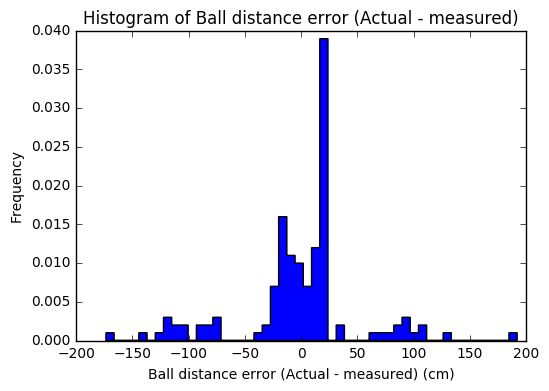

In [93]:
ball_info = [{'actual': process_actual(output['Ball_centre'], output['Location']), \
              'nao_observed': process_nao(output['Balls'], output['Location'], output['Heading'])} \
             for output in lines if (len(output['Balls']) > 0 and output['Ball_centre'] is not None)]

ball_distance_error = [calc_distance_error(measurement) for measurement in ball_info]

n, bins, patches = plt.hist(ball_distance_error, 50, normed=1, histtype='stepfilled')
#y = mlab.normpdf(bins, mu, sigma)

#plt.plot(bins, y, 'r--')

plt.xlabel('Ball distance error (Actual - measured) (cm)')
plt.ylabel('Frequency')
plt.title(r'Histogram of Ball distance error (Actual - measured)')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

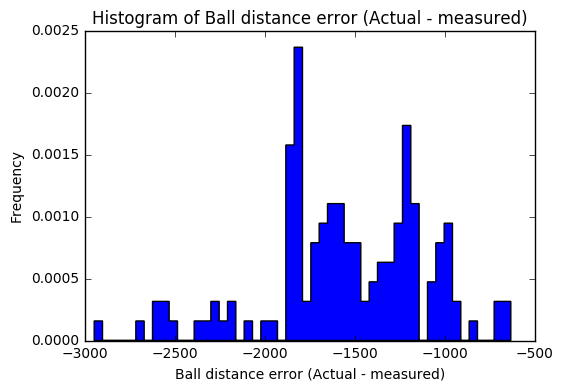

In [89]:
ball_info = [{'actual': process_actual(output['Ball_centre'], output['Location']), \
              'nao_observed': process_nao(output['Balls'], output['Location'], output['Heading'])} \
             for output in lines if (len(output['Balls']) > 0 and output['Ball_centre'] is not None)]

ball_distance_error = [calc_distance_error(measurement) for measurement in ball_info]

n, bins, patches = plt.hist(ball_distance_error, 50, normed=1, histtype='stepfilled')
#y = mlab.normpdf(bins, mu, sigma)

#plt.plot(bins, y, 'r--')

plt.xlabel('Ball distance error (Actual - measured)')
plt.ylabel('Frequency')
plt.title(r'Histogram of Ball distance error (Actual - measured)')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()

In [ ]:
ball_error = [calc_error(measurement) for measurement in ball_info]
